## Monte Carlo - Forecasting Stock Prices - Part III

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Forecasting Future Stock Prices – continued:

In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

data = pd.read_csv('D:/Python/MSFT_2000.csv', index_col = 'Date')

log_returns = np.log(1 + data.pct_change())
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()

drift.values
stdev.values

t_intervals = 250
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

***

Create a variable S0 equal to the last adjusted closing price of Microsoft. Use the “iloc” method.

In [2]:
S0 = data.iloc[-1]
S0

MSFT    77.610001
Name: 2017-10-18, dtype: float64

Create a variable price_list with the same dimension as the daily_returns matrix. 

In [3]:
price_list = np.zeros_like(daily_returns)
price_list

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [4]:
price_list[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

Set the values on the first row of the price_list array equal to S0.

In [5]:
price_list[0] = S0
price_list

array([[ 77.610001,  77.610001,  77.610001, ...,  77.610001,  77.610001,
         77.610001],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       ..., 
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ]])

Create a loop in the range (1, t_intervals) that reassigns to the price in time t the product of the price in day (t-1) with the value of the daily returns in t.

In [6]:
for t in xrange(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [7]:
price_list

array([[ 77.610001  ,  77.610001  ,  77.610001  , ...,  77.610001  ,
         77.610001  ,  77.610001  ],
       [ 78.35790748,  79.27291243,  76.4867635 , ...,  78.23018728,
         79.38229157,  74.29955719],
       [ 77.28973362,  79.98963946,  76.01104412, ...,  79.5661156 ,
         78.09894931,  71.01168165],
       ..., 
       [ 81.62922314,  46.82383071,  62.93076442, ...,  65.31932919,
         48.82760447,  90.3917531 ],
       [ 86.6561648 ,  47.80596246,  65.89787209, ...,  64.36758153,
         47.78981009,  87.98043608],
       [ 87.66339966,  47.69699548,  65.7448501 , ...,  65.21458941,
         47.10062278,  87.87553545]])

Finally, plot the obtained price list data.

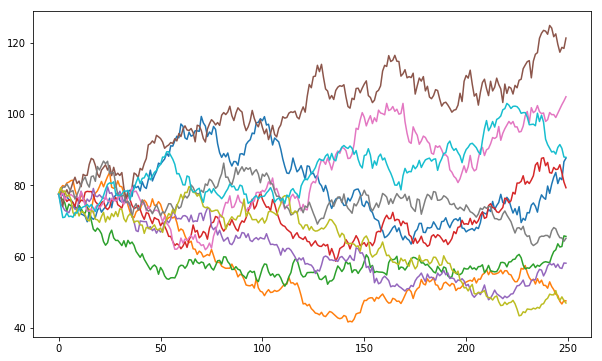

In [8]:
plt.figure(figsize=(10,6))
plt.plot(price_list);